In [1]:
import sqlite3
import pandas as pd
import matplotlib as rc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [2]:
# set style for seaborn
sns.set_style("whitegrid")
sns.set_context("paper")
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')


In [3]:
# connect to database
connection = sqlite3.connect("../output/db/bulk_analysis_2019-11-08_1000ms.db")


In [4]:
# load games and moves into dataframes 
df_game_dirty = pd.read_sql("SELECT * FROM game", connection)
df_move_dirty = pd.read_sql("SELECT * FROM move", connection)

# remove games that are either too short or too long
df_game = remove_outlier(df_game_dirty, "length")
df_move = df_move_dirty[df_move_dirty["game_id"].isin(df_game["id"])]



In [5]:
# box_dirty = sns.boxplot(y=df_move["best_move_score_diff"])

Text(0, 0.5, 'mistakes')

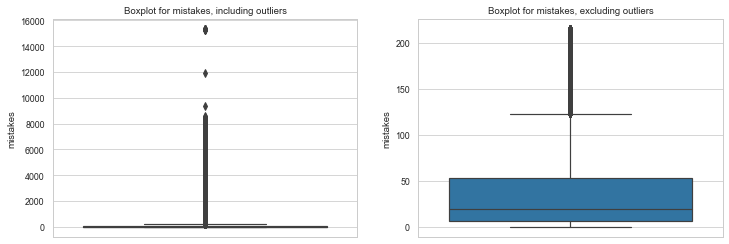

In [6]:
df_move_mistake_clean = remove_outlier(df_move, "best_move_score_diff")
#
f, axes = plt.subplots(1, 2, figsize=(12, 4))
box_dirty = sns.boxplot(y=df_move["best_move_score_diff"], ax=axes[0])
axes[0].set_title("Boxplot for mistakes, including outliers")
axes[0].set_ylabel("mistakes")
box_clean = sns.boxplot(y=df_move_mistake_clean["best_move_score_diff"], ax=axes[1])
axes[1].set_title("Boxplot for mistakes, excluding outliers")
axes[1].set_ylabel("mistakes")


In [7]:
f.savefig("boxplot_mistakes.pgf")
f.savefig("boxplot_mistakes.pdf")


LatexError: LaTeX returned an error, probably missing font or error in preamble:
b'This is XeTeX, Version 3.14159265-2.6-0.99998 (MiKTeX 2.9.6400 64-bit)\r\n**entering extended mode\r\nLaTeX2e <2017-04-15>\r\nBabel <3.12> and hyphenation patterns for 75 language(s) loaded.\r\n\r\n*\r\n*("C:\\Program Files\\MiKTeX 2.9\\tex/latex\\base\\minimal.cls"\r\nDocument Class: minimal 2001/05/25 Standard LaTeX minimal class\r\n)\r\n(Please type a command or say `\\end\')\r\n*\r\n*("C:\\Program Files\\MiKTeX 2.9\\tex/latex\\fontspec\\fontspec.sty"'

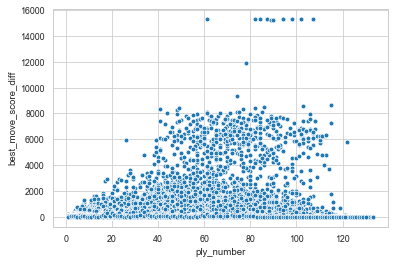

In [19]:
scatter_mistake = sns.scatterplot(x="ply_number", y="best_move_score_diff", data=df_move)

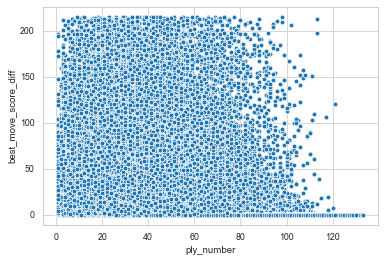

In [20]:
scatter_mistake = sns.scatterplot(x="ply_number", y="best_move_score_diff", data=df_move_mistake_clean)

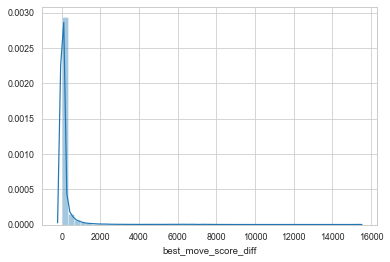

In [21]:

sns.distplot(df_move["best_move_score_diff"])


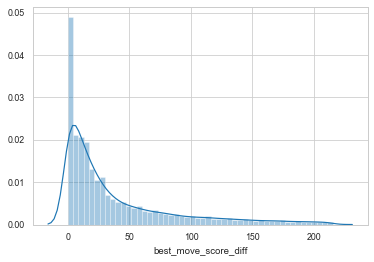

In [22]:
sns.distplot(df_move_mistake_clean["best_move_score_diff"])

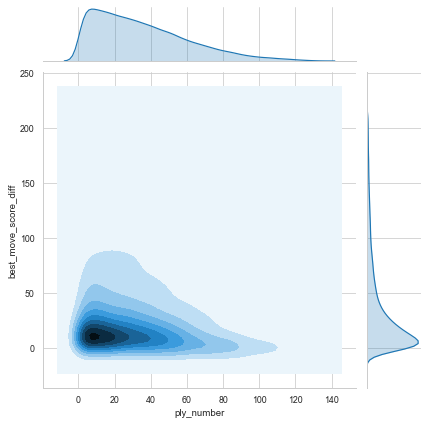

In [24]:
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_mistake_clean, kind="kde");

In [21]:

df_move_2040_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 20 & length <= 40')["id"])]
df_move_2040 = remove_outlier(df_move_2040_dirty, "best_move_score_diff")
df_move_4060_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 40 & length <= 60')["id"])]
df_move_4060 = remove_outlier(df_move_4060_dirty, "best_move_score_diff")
df_move_6080_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 60 & length <= 80')["id"])]
df_move_6080 = remove_outlier(df_move_6080_dirty, "best_move_score_diff")
df_move_80100_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 80 & length <= 100')["id"])]
df_move_80100 = remove_outlier(df_move_80100_dirty, "best_move_score_diff")
df_move_100120_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 100 & length <= 120')["id"])]
df_move_100120 = remove_outlier(df_move_100120_dirty, "best_move_score_diff")

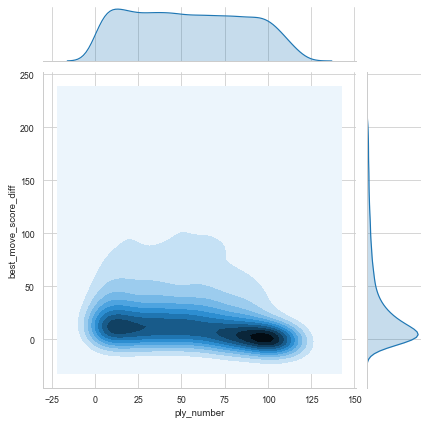

In [22]:
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_100120, kind="kde");

Text(0, 0.5, 'centipawn')

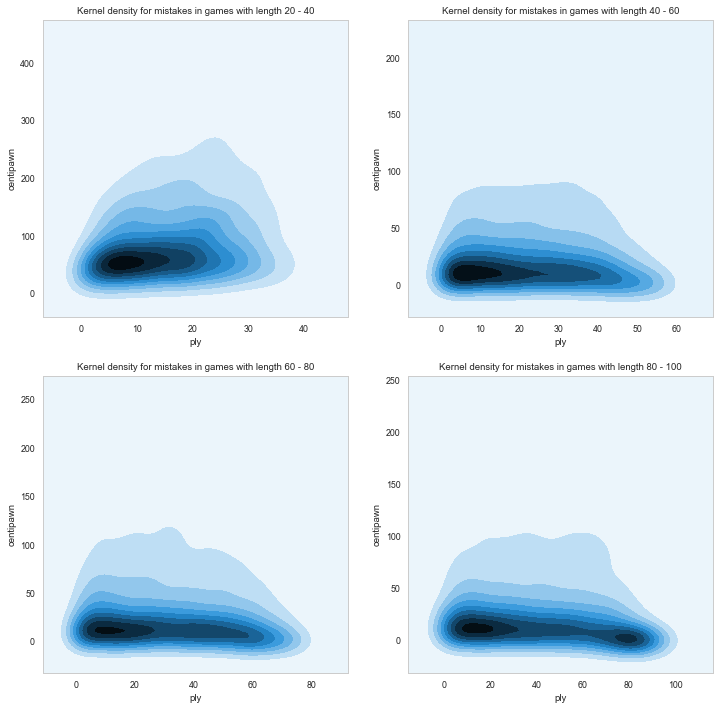

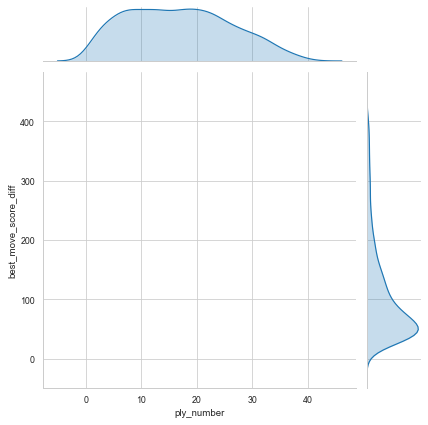

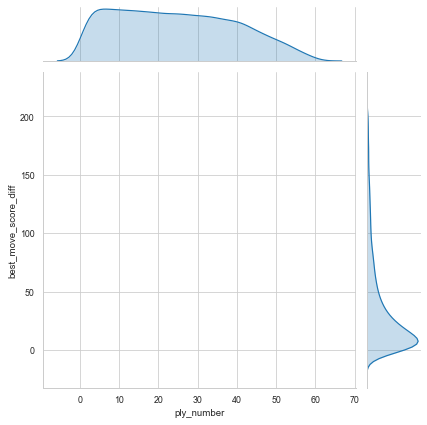

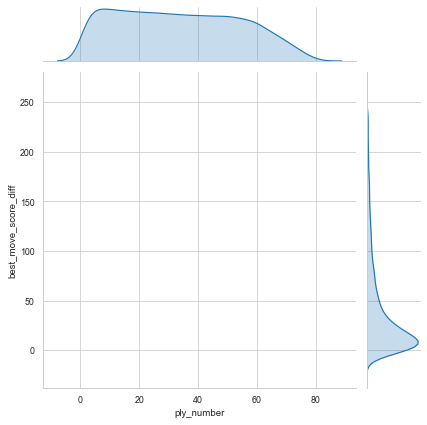

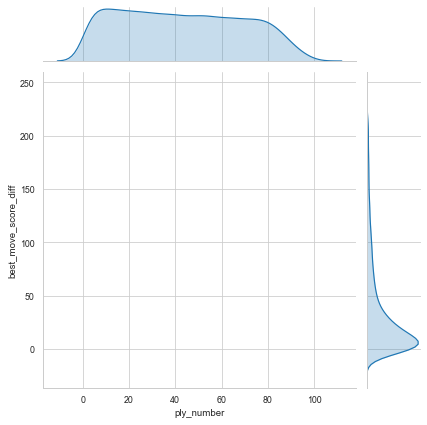

In [23]:

f, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_2040, kind="kde", ax=axes[0][0]);
axes[0][0].set_title("Kernel density for mistakes in games with length 20 - 40")
axes[0][0].set_xlabel("ply")
axes[0][0].set_ylabel("centipawn")
#plot([0, ])
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_4060, kind="kde", ax=axes[0][1]);
axes[0][1].set_title("Kernel density for mistakes in games with length 40 - 60")
axes[0][1].set_xlabel("ply")
axes[0][1].set_ylabel("centipawn")
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_6080, kind="kde", ax=axes[1][0]);
axes[1][0].set_title("Kernel density for mistakes in games with length 60 - 80")
axes[1][0].set_xlabel("ply")
axes[1][0].set_ylabel("centipawn")
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_80100, kind="kde", ax=axes[1][1]);
axes[1][1].set_title("Kernel density for mistakes in games with length 80 - 100")
axes[1][1].set_xlabel("ply")
axes[1][1].set_ylabel("centipawn")


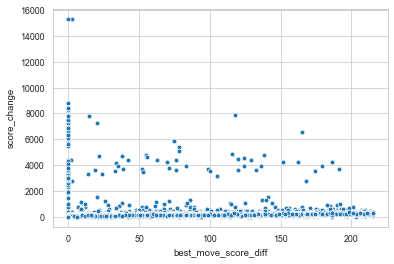

In [50]:

sns.scatterplot(x="best_move_score_diff", y="score_change", data=df_move_mistake_clean)

In [25]:
df_move_80100_normal_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 80 & length <= 100')["id"])].query('best_move_score_diff < 30')
df_move_80100_normal = remove_outlier(df_move_80100_normal_dirty, "best_move_score_diff")
df_move_80100_inacc_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 80 & length <= 100')["id"])].query('best_move_score_diff >= 30 & best_move_score_diff < 100')
df_move_80100_inacc = remove_outlier(df_move_80100_inacc_dirty, "best_move_score_diff")
df_move_80100_mistake_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 80 & length <= 100')["id"])].query('best_move_score_diff >= 100 & best_move_score_diff < 300')
df_move_80100_mistake = remove_outlier(df_move_80100_mistake_dirty, "best_move_score_diff")
df_move_80100_blunder_dirty = df_move[df_move["game_id"].isin(df_game.query('length >= 80 & length <= 100')["id"])].query('best_move_score_diff >= 300')
df_move_80100_blunder = remove_outlier(df_move_80100_blunder_dirty, "best_move_score_diff")

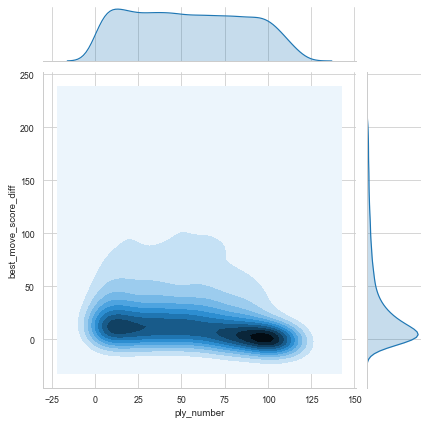

In [26]:
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_100120, kind="kde");

Text(0, 0.5, 'centipawn')

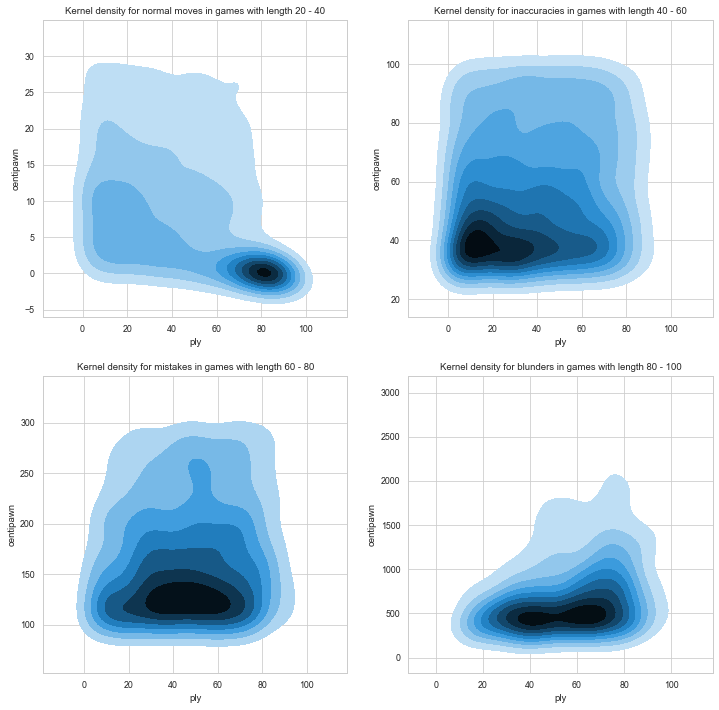

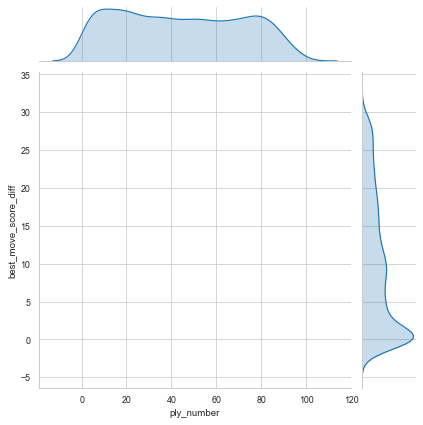

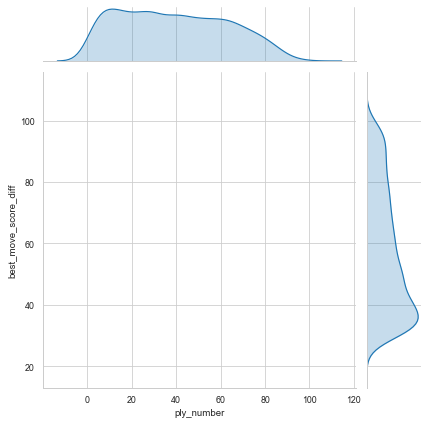

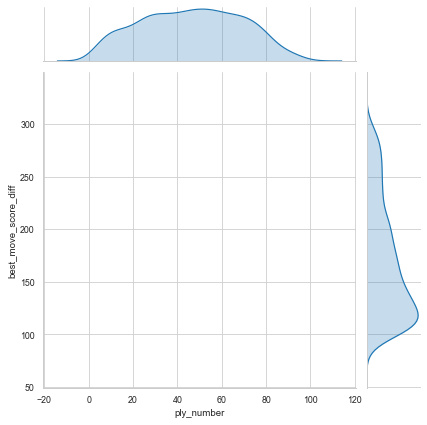

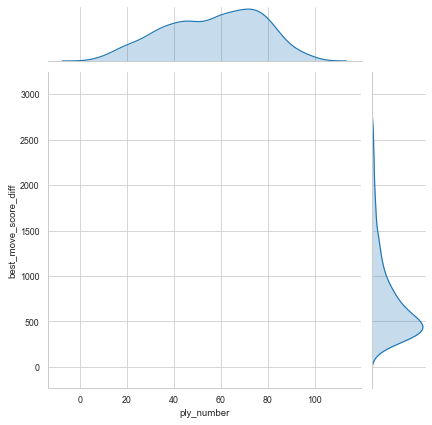

In [41]:

f, axes = plt.subplots(2, 2, figsize=(12, 12))
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_80100_normal, kind="kde", shade_lowest=False, ax=axes[0][0]);
axes[0][0].set_title("Kernel density for normal moves in games with length 20 - 40")
axes[0][0].set_xlabel("ply")
axes[0][0].set_ylabel("centipawn")
#plot([0, ])
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_80100_inacc, kind="kde", shade_lowest=False, ax=axes[0][1]);
axes[0][1].set_title("Kernel density for inaccuracies in games with length 40 - 60")
axes[0][1].set_xlabel("ply")
axes[0][1].set_ylabel("centipawn")
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_80100_mistake, kind="kde", shade_lowest=False, ax=axes[1][0]);
axes[1][0].set_title("Kernel density for mistakes in games with length 60 - 80")
axes[1][0].set_xlabel("ply")
axes[1][0].set_ylabel("centipawn")
sns.jointplot(x="ply_number", y="best_move_score_diff", data=df_move_80100_blunder, kind="kde", shade_lowest=False, ax=axes[1][1]);
axes[1][1].set_title("Kernel density for blunders in games with length 80 - 100")
axes[1][1].set_xlabel("ply")
axes[1][1].set_ylabel("centipawn")


Text(0.5, 0, 'centipawn')

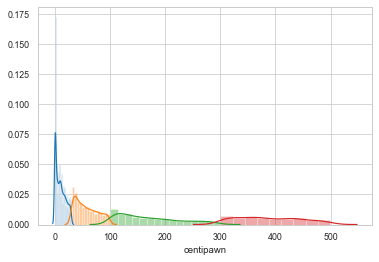

In [54]:

sns.distplot(df_move_80100_normal["best_move_score_diff"])
sns.distplot(df_move_80100_inacc["best_move_score_diff"])
sns.distplot(df_move_80100_mistake["best_move_score_diff"])
df_move_80100_blunder_cut = df_move_80100_blunder.query('best_move_score_diff < 500')
dist_mistakes = sns.distplot(df_move_80100_blunder_cut["best_move_score_diff"])
dist_mistakes.set_xlabel("centipawn")